In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)


In [108]:
dataset = pd.read_csv('./datasets/dataset_0312.csv', sep=",")

Covariance matrix :

          IR0_meas  IR1_meas  IR2_meas  IR3_meas   IR0_cam   IR1_cam  \
IR0_meas  1.000000 -0.366704 -0.813940  0.161024 -0.796964  0.521238   
IR1_meas -0.366704  1.000000  0.381991 -0.657423  0.315474 -0.850780   
IR2_meas -0.813940  0.381991  1.000000 -0.216693  0.731488 -0.426498   
IR3_meas  0.161024 -0.657423 -0.216693  1.000000  0.019265  0.553010   
IR0_cam  -0.796964  0.315474  0.731488  0.019265  1.000000 -0.489408   
IR1_cam   0.521238 -0.850780 -0.426498  0.553010 -0.489408  1.000000   
IR2_cam   0.754982 -0.332833 -0.916373  0.212426 -0.729220  0.383368   
IR3_cam  -0.055683  0.495842  0.110762 -0.820627 -0.127835 -0.455322   

           IR2_cam   IR3_cam  
IR0_meas  0.754982 -0.055683  
IR1_meas -0.332833  0.495842  
IR2_meas -0.916373  0.110762  
IR3_meas  0.212426 -0.820627  
IR0_cam  -0.729220 -0.127835  
IR1_cam   0.383368 -0.455322  
IR2_cam   1.000000 -0.128439  
IR3_cam  -0.128439  1.000000  


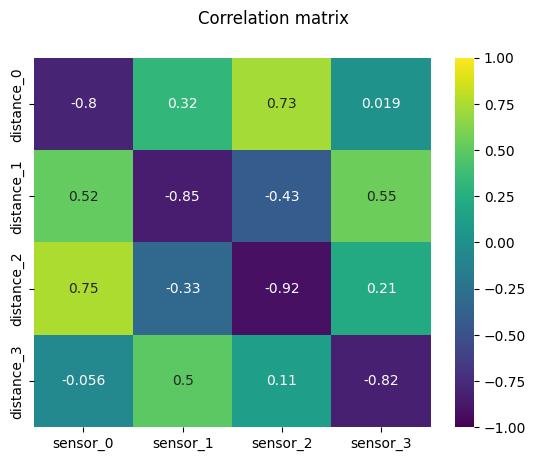

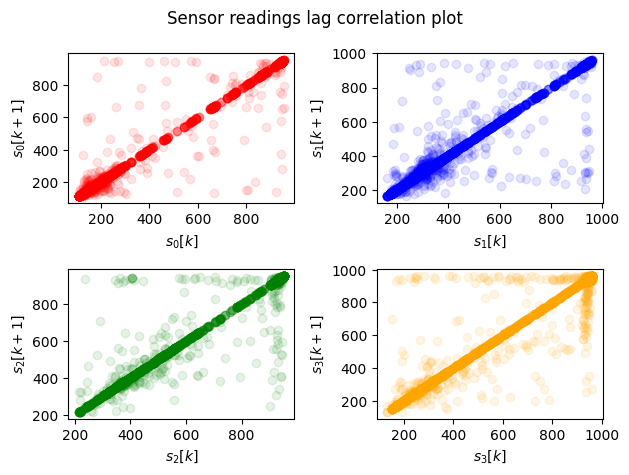

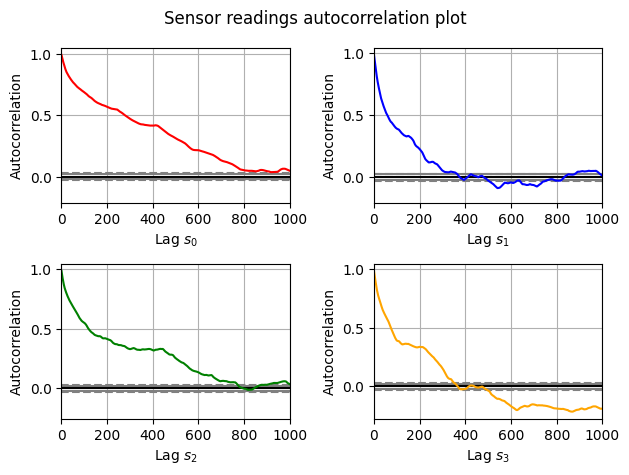

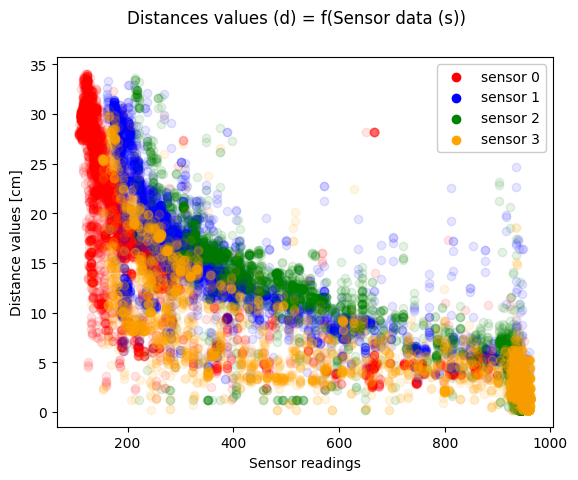

In [189]:
# Train/Test split
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# X / Y split
X_train = train_dataset.drop(['IR0_cam','IR1_cam','IR2_cam','IR3_cam'], axis=1)
Y_train = train_dataset.drop(['IR0_meas','IR1_meas','IR2_meas','IR3_meas'], axis=1)
X_test = test_dataset.drop(['IR0_cam','IR1_cam','IR2_cam','IR3_cam'], axis=1)
Y_test = test_dataset.drop(['IR0_meas','IR1_meas','IR2_meas','IR3_meas'], axis=1)

# Stacking
X_train_stack = X_train.stack()
Y_train_stack = Y_train.stack()
X_test_stack = X_test.stack()
Y_test_stack = Y_test.stack()

# https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/


corrM = dataset.corr()
print('Covariance matrix :\n')
# print(corrM.iloc[4::,0:4])
print(corrM)


fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle('Correlation matrix')
# plt.imshow(corrM,vmin=-1, vmax=1)
# plt.imshow(corrM.iloc[4::,0:4],vmin=-1, vmax=1)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# sns.color_palette("viridis", as_cmap=True)
sns.heatmap(corrM.iloc[4::,0:4],vmin=-1, vmax=1,cmap = "viridis", annot = True, xticklabels= ['sensor_0','sensor_1','sensor_2','sensor_3'], yticklabels= ['distance_0','distance_1','distance_2','distance_3'])
plt.show()

# fig, axes = plt.subplots(nrows=2, ncols=2)
# fig.suptitle('Measured values and real values SEPARATE (x[volts], y[cm])')
# dataset.plot(ax=axes[0,0],x="IR0_meas", y=["IR0_cam"],kind ="scatter", color="red", alpha=0.1)
# dataset.plot(ax=axes[0,1],x="IR1_meas", y=["IR1_cam"],kind ="scatter", color="blue", alpha=0.1)
# dataset.plot(ax=axes[1,0],x="IR2_meas", y=["IR2_cam"],kind ="scatter", color="green", alpha=0.1)
# dataset.plot(ax=axes[1,1],x="IR3_meas", y=["IR3_cam"],kind ="scatter", color="orange", alpha=0.1)
# plt.show()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.suptitle('Sensor readings lag correlation plot')
# dataset["IR0_meas"].lagplot(ax=axes[0,0], color="red", alpha=0.1)
ax0  = lag_plot(dataset["IR0_meas"], ax=axes[0,0], c="red", alpha=0.1, label='sensor 0')
ax1  = lag_plot(dataset["IR1_meas"], ax=axes[0,1], c="blue", alpha=0.1, label='sensor 1')
ax2  = lag_plot(dataset["IR2_meas"], ax=axes[1,0], c="green", alpha=0.1, label='sensor 2')
ax3  = lag_plot(dataset["IR3_meas"], ax=axes[1,1], c="orange", alpha=0.1, label='sensor 3')
ax0.set_xlabel('$s_0[k]$');ax0.set_ylabel('$s_0[k+1]$')
ax1.set_xlabel('$s_1[k]$');ax1.set_ylabel('$s_1[k+1]$')
ax2.set_xlabel('$s_2[k]$');ax2.set_ylabel('$s_2[k+1]$')
ax3.set_xlabel('$s_3[k]$');ax3.set_ylabel('$s_3[k+1]$')
# ax0.set_alpha(0.1)
# ax1.set_alpha(0.1)
# ax2.set_alpha(0.1)
# ax3.set_alpha(0.1)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.suptitle('Sensor readings autocorrelation plot')
# dataset["IR0_meas"].lagplot(ax=axes[0,0], color="red", alpha=0.1)
ax0 = autocorrelation_plot(dataset["IR0_meas"], ax=axes[0,0], c="red", alpha=1)
ax1 = autocorrelation_plot(dataset["IR1_meas"], ax=axes[0,1], c="blue", alpha=1)
ax2 = autocorrelation_plot(dataset["IR2_meas"], ax=axes[1,0], c="green", alpha=1)
ax3 = autocorrelation_plot(dataset["IR3_meas"], ax=axes[1,1], c="orange", alpha=1)
ax0.set_xlabel('Lag $s_0$');ax0.set_yticks([0,0.5,1]); ax0.set_xlim([0, 1000]);
ax1.set_xlabel('Lag $s_1$');ax1.set_yticks([0,0.5,1]); ax1.set_xlim([0, 1000]);
ax2.set_xlabel('Lag $s_2$');ax2.set_yticks([0,0.5,1]); ax2.set_xlim([0, 1000]);
ax3.set_xlabel('Lag $s_3$');ax3.set_yticks([0,0.5,1]); ax3.set_xlim([0, 1000]);

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle('Distances values (d) = f(Sensor data (s))')
l0 = plt.scatter(x=dataset["IR0_meas"], y=dataset["IR0_cam"], color="red", label="sensor 0")
l1 = plt.scatter(x=dataset["IR1_meas"], y=dataset["IR1_cam"], color="blue", label="sensor 1")
l2 = plt.scatter(x=dataset["IR2_meas"], y=dataset["IR2_cam"], color="green", label="sensor 2")
l3 = plt.scatter(x=dataset["IR3_meas"], y=dataset["IR3_cam"], color="orange", label="sensor 3")
plt.legend(loc="upper right", framealpha=1)
l0.set_alpha(0.1)
l1.set_alpha(0.1)
l2.set_alpha(0.1)
l3.set_alpha(0.1)
plt.xlabel("Sensor readings")
plt.ylabel("Distance values [cm]")
plt.show()

In [188]:
stats = dataset.describe().iloc[:,0:4].drop(['std','25%','50%','75%']).rename(columns={'IR0_meas': 'sensor 0', 'IR1_meas': 'sensor 1','IR2_meas': 'sensor 2', 'IR3_meas': 'sensor 3'}).astype(int)
print(stats.to_latex(index = True, multirow = True))

\begin{tabular}{lrrrr}
\toprule
{} &  sensor 0 &  sensor 1 &  sensor 2 &  sensor 3 \\
\midrule
count &      7497 &      7497 &      7497 &      7497 \\
mean  &       307 &       430 &       788 &       732 \\
min   &       109 &       162 &       214 &       131 \\
max   &       957 &       961 &       953 &       962 \\
\bottomrule
\end{tabular}



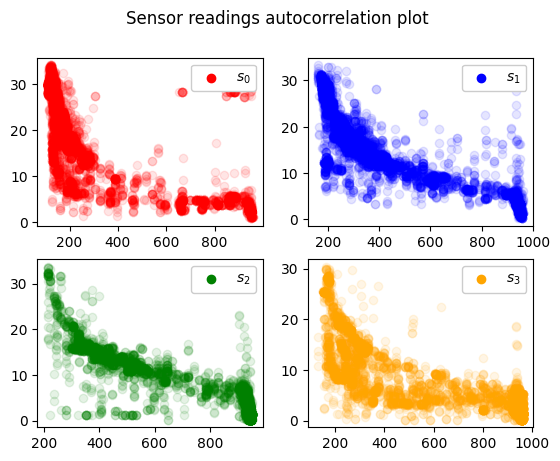

In [190]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.suptitle('Sensor readings autocorrelation plot')
l0 = axes[0,0].scatter(x=dataset["IR0_meas"], y=dataset["IR0_cam"], color="red", label=r'$s_0$')
l1 = axes[0,1].scatter(x=dataset["IR1_meas"], y=dataset["IR1_cam"], color="blue", label=r'$s_1$')
l2 = axes[1,0].scatter(x=dataset["IR2_meas"], y=dataset["IR2_cam"], color="green", label=r'$s_2$')
l3 = axes[1,1].scatter(x=dataset["IR3_meas"], y=dataset["IR3_cam"], color="orange", label=r'$s_3$')
axes[0,0].legend(loc="upper right", framealpha=1)
axes[0,1].legend(loc="upper right", framealpha=1)
axes[1,0].legend(loc="upper right", framealpha=1)
axes[1,1].legend(loc="upper right", framealpha=1)
l0.set_alpha(0.1)
l1.set_alpha(0.1)
l2.set_alpha(0.1)
l3.set_alpha(0.1)
plt.show()

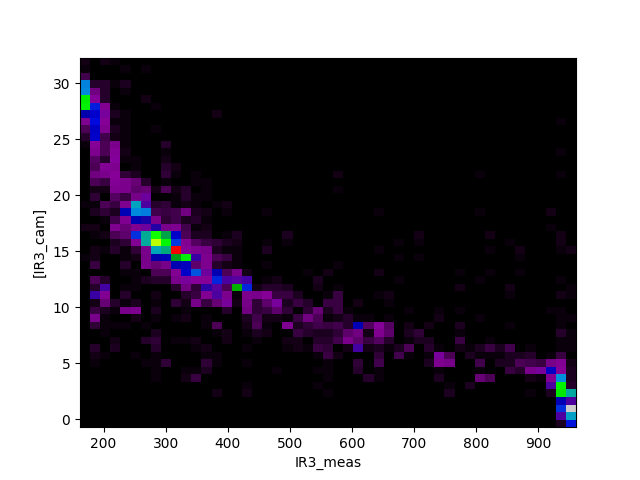

In [6]:

x = np.array(dataset["IR1_meas"])
y = np.array(dataset["IR1_cam"])
x_min = np.min(x)
x_max = np.max(x)
y_min = np.min(y)
y_max = np.max(y)
x_bins = np.linspace(x_min, x_max, 50)
y_bins = np.linspace(y_min, y_max, 50)
plt.hist2d(x,y,bins=[x_bins, y_bins], cmap = plt.cm.nipy_spectral)
plt.show()
# fig, ax = plt.subplots(nrows=1, ncols=1)
# dataset.plot.hexbin(ax=ax,x="IR0_meas", y=["IR0_cam"], gridsize=25)

In [81]:
# dataset = pd.read_csv('./datasets/dataset_0312.csv', sep=",")
# dataset.iloc[:,4::] = dataset.iloc[:,4::]
# dataset.to_csv('./datasets/dataset_0312.csv', sep=",", index=False)